<a href="https://colab.research.google.com/github/RatchanonPa/python_dataviz2024/blob/main/Visualize_Data_Comparison_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) # บังคับให้เชื่อมข้อมูลใน drive ใหม่ เพราะลบข้อมูลเดิมออก

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/data_viz_2024_DATA'

In [6]:
data = pd.read_csv(os.path.join(path,'barchart_data.csv'))
data = data.iloc[:,1:]
data.head()

,Year,Quarter,Region,Brand,Price Category,Sales
0,2021,Q1,North America,BrandA,Budget,8270
1,2021,Q1,North America,BrandA,Mid-range,1860
2,2021,Q1,North America,BrandA,Premium,6390
3,2021,Q1,North America,BrandB,Budget,6191
4,2021,Q1,North America,BrandB,Mid-range,6734


In [7]:
data['Price Category'] = data['Price Category'].replace('Budget', 'รุ่นประหยัด')
data['Price Category'] = data['Price Category'].replace('Mid-range', 'รุ่นเริ่มต้น')
data['Price Category'] = data['Price Category'].replace('Premium', 'รุ่นเรือธง')

In [8]:
data

,Year,Quarter,Region,Brand,Price Category,Sales
0,2021,Q1,North America,BrandA,รุ่นประหยัด,8270
1,2021,Q1,North America,BrandA,รุ่นเริ่มต้น,1860
2,2021,Q1,North America,BrandA,รุ่นเรือธง,6390
3,2021,Q1,North America,BrandB,รุ่นประหยัด,6191
4,2021,Q1,North America,BrandB,รุ่นเริ่มต้น,6734
...,...,...,...,...,...,...
475,2022,Q4,Africa,BrandC,รุ่นเริ่มต้น,6486
476,2022,Q4,Africa,BrandC,รุ่นเรือธง,9335
477,2022,Q4,Africa,BrandD,รุ่นประหยัด,5980
478,2022,Q4,Africa,BrandD,รุ่นเริ่มต้น,8266


## เตรียมข้อมูล

#### แปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด datetime

In [9]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

KeyError: 'search_timestamp'

## Bar chart (กราฟแท่ง)
(กราฟผลไม้)

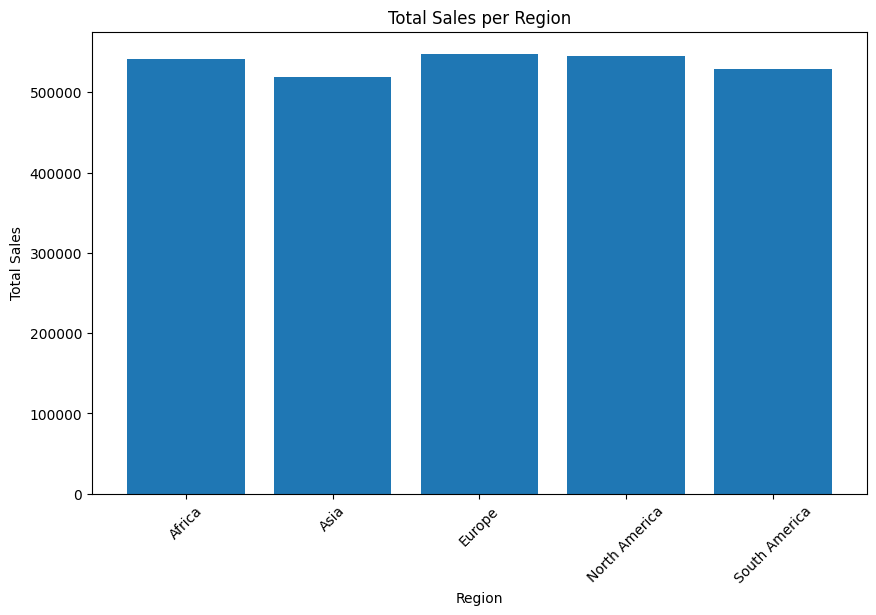

In [10]:
# prompt: plot bar chart เปรียบเทียบปริมาณ sales ในแต่ละ region ทั้งหมดของแต่ละ region ด้วยคำสั่ง plt.bar
# Group data by region and sum sales
region_sales = data.groupby('Region')['Sales'].sum()# x_axis_values

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(region_sales.index, region_sales.values) #y_axis_values

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales per Region')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [11]:
region_sales

,Sales
Region,
Africa,541556
Asia,519608
Europe,548068
North America,545563
South America,529246


In [12]:
region_sales.values

array([541556, 519608, 548068, 545563, 529246])

In [13]:
region_sales.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'South America'], dtype='object', name='Region')

In [14]:
region_sales.reset_index()['Region']

,Region
0,Africa
1,Asia
2,Europe
3,North America
4,South America


In [15]:
# Group data by region and sum sales
region_sales = data.groupby(['Region', 'Quarter'])['Sales'].sum()
region_sales

Region         Quarter
Africa         Q1         124543
               Q2         144451
               Q3         141602
               Q4         130960
Asia           Q1         123201
               Q2         140369
               Q3         125413
               Q4         130625
Europe         Q1         136996
               Q2         139328
               Q3         141905
               Q4         129839
North America  Q1         130631
               Q2         144435
               Q3         124104
               Q4         146393
South America  Q1         127485
               Q2         138468
               Q3         132925
               Q4         130368
Name: Sales, dtype: int64

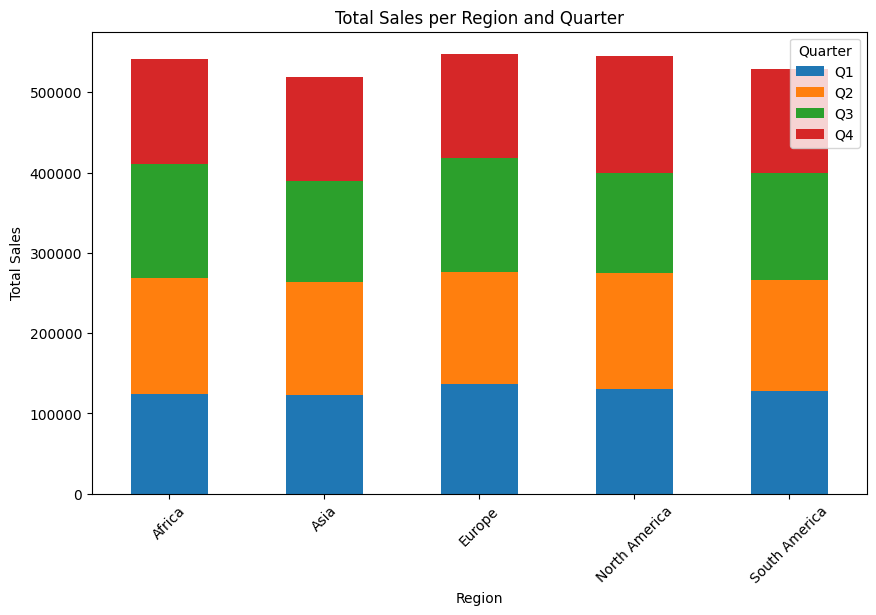

In [16]:
# prompt: plot bar chart เปรียบเทียบปริมาณ sales ในแต่ละ Quarterของแต่ละ region ด้วย stacked barchart โดยใช้คำสั่ง plt.bar
# Group data by region and quarter, then sum sales
region_quarter_sales = data.groupby(['Region', 'Quarter'])['Sales'].sum().unstack()

# Create stacked bar chart
region_quarter_sales.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales per Region and Quarter')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


## plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price category

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

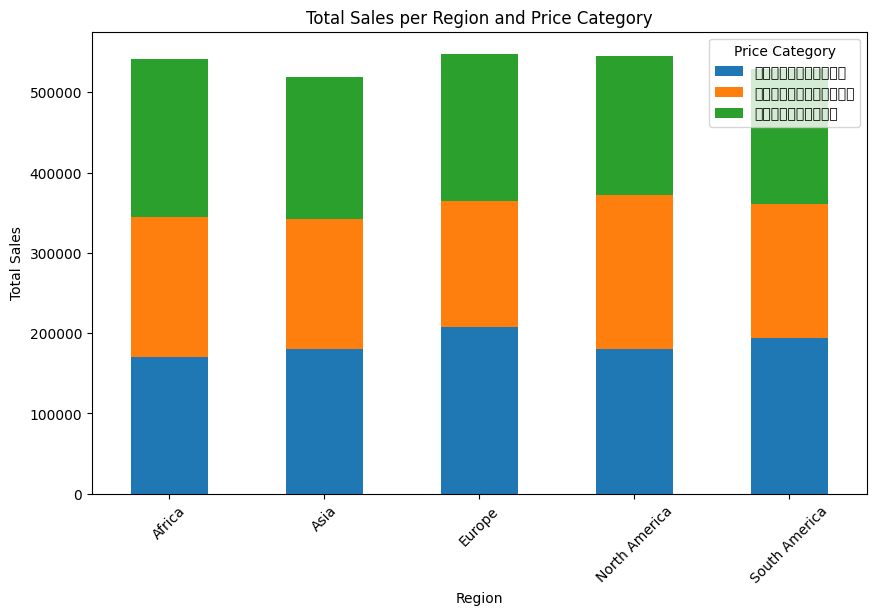

In [17]:
# prompt: plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price category
# Group data by region and price category, then sum sales
region_price_category_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create stacked bar chart
region_price_category_sales.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales per Region and Price Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [18]:
import matplotlib
matplotlib.__version__

'3.7.1'

การแสดงตัวอักษรภาษาไทยในกราฟ matplotlib
https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31


https://colab.research.google.com/drive/1sTdTZx_Cm51mc8OL_QHtehWyO4725sGl#scrollTo=Ak9SbVd5L7U8

In [19]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [20]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

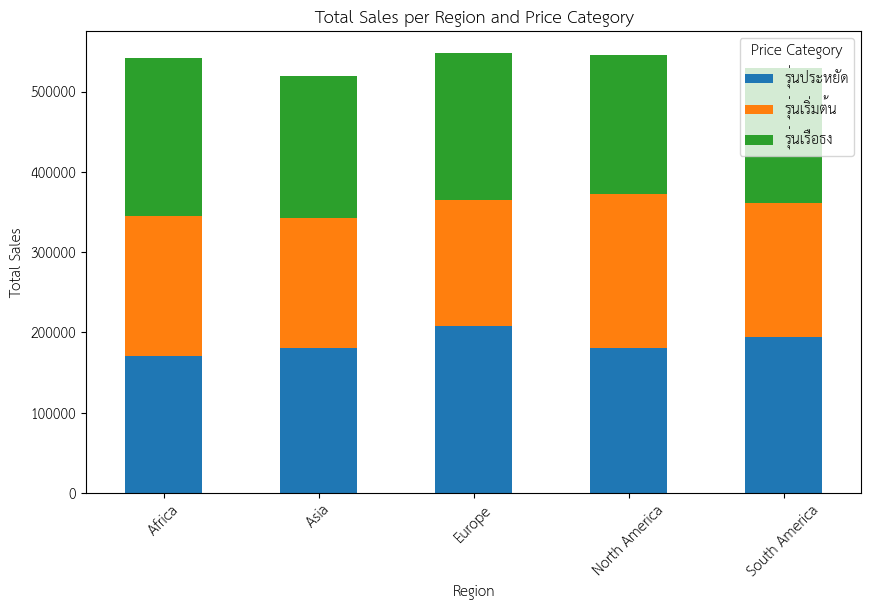

In [21]:
# prompt: plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price category
# Group data by region and price category, then sum sales
region_price_category_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create stacked bar chart
region_price_category_sales.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales per Region and Price Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

## Plot stacked barchart ด้วย matplotlib

In [24]:
region_brand_sales = data.groupby(['Region', 'Brand'])['Sales'].sum().unstack()
region_brand_sales

Brand,BrandA,BrandB,BrandC,BrandD
Region,,,,
Africa,132019,140187,132273,137077
Asia,136205,124678,139677,119048
Europe,135638,135069,131700,145661
North America,124810,153135,140802,126816
South America,144169,138543,115774,130760


In [25]:
region_brand_sales['BrandA'].values

array([132019, 136205, 135638, 124810, 144169])

In [26]:
region_brand_sales.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'South America'], dtype='object', name='Region')

## plot ส่วนแรก

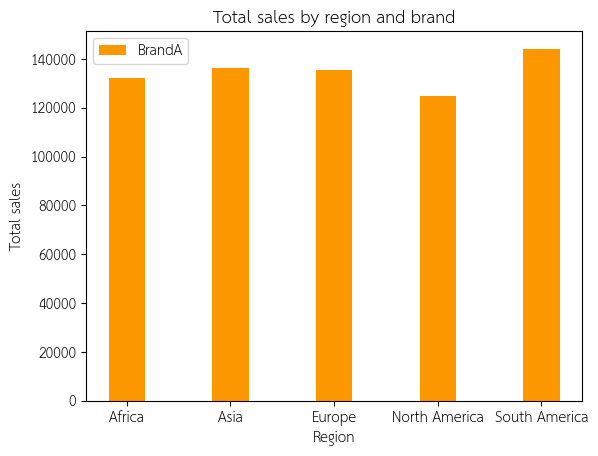

In [27]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 2

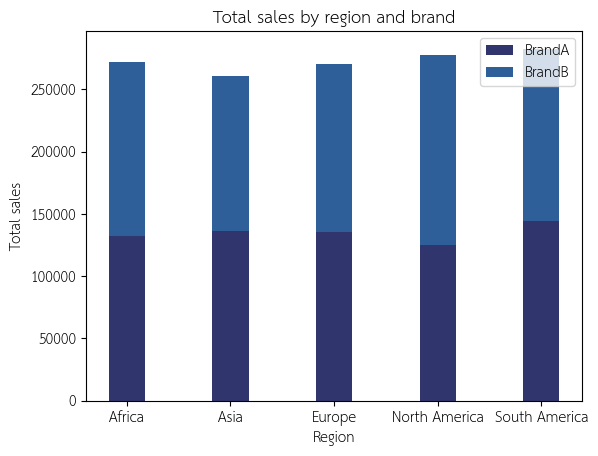

In [28]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#31356e')
ax.bar(region_brand_sales.index, region_brand_sales['BrandB'].values, width, bottom=region_brand_sales['BrandA'].values, label='BrandB',color = '#2f5f98')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 3 ขึ้นไป

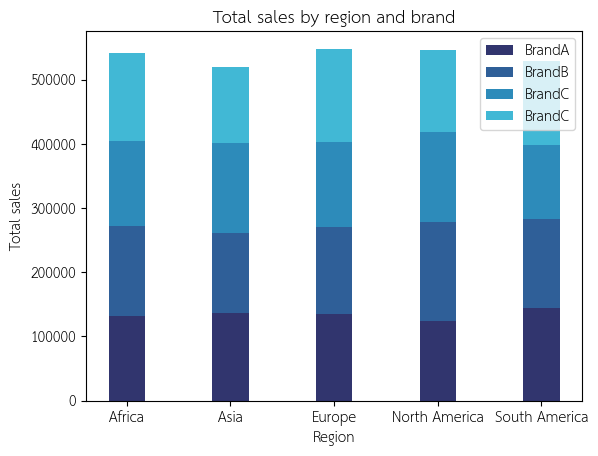

In [29]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#31356e')
ax.bar(region_brand_sales.index, region_brand_sales['BrandB'].values, width, bottom=region_brand_sales['BrandA'].values, label='BrandB',color = '#2f5f98')
ax.bar(region_brand_sales.index, region_brand_sales['BrandC'].values, width, bottom=region_brand_sales['BrandA'] + region_brand_sales['BrandB'].values, label='BrandC',color = '#2d8bba')
ax.bar(region_brand_sales.index, region_brand_sales['BrandD'].values, width, bottom=region_brand_sales['BrandA'] + region_brand_sales['BrandB'].values + region_brand_sales['BrandC'].values, label='BrandC',color = '#41b8d5')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## Grouped Bar chart (เปรียบเทียบในกลุ่ม)

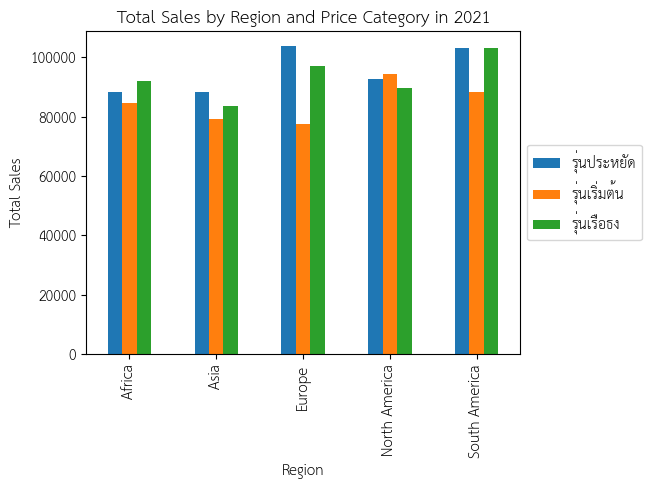

In [30]:
# prompt: plot grouped bar chart ของแต่ละ region ในปี 2021 เพื่อเปรียบเทียบ sales ของแต่ละ price category ย้าย legend ออกไปข้างนอกกราฟ ปรับขนาดplotให้เล็กลง 30%

# Filter data for the year 2021
data_2021 = data[data['Year'] == 2021]

# Group data by region and price category, then sum sales
region_price_category_sales_2021 = data_2021.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the grouped bar chart
ax = region_price_category_sales_2021.plot(kind='bar', figsize=(8, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category in 2021')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Adjust plot size
plt.gcf().set_size_inches(plt.gcf().get_size_inches() * 0.7)

# Show the plot
plt.show()

## plot grouped bar chart โดยแยกกลุ่มตามประเภทหนังและเปรียบเทียบ Rating จาก ความยาวของหนัง

In [31]:
movie_file_path = os.path.join(path,'IMDb Movies India.csv')
print(movie_file_path)

/content/drive/MyDrive/data_viz_2024_DATA/IMDb Movies India.csv


In [32]:
movie_df = pd.read_csv(movie_file_path, encoding='latin-1') # try a different encoding such as latin-1
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
movie_df = movie_df.dropna(subset=['Rating', 'Duration', 'Genre'])
movie_df = movie_df[['Rating', 'Duration', 'Genre']] # Use a list to select multiple columns
print(movie_df.info())
movie_df

<class 'pandas.core.frame.DataFrame'>
Index: 5820 entries, 1 to 15508
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    5820 non-null   float64
 1   Duration  5820 non-null   float64
 2   Genre     5820 non-null   object 
dtypes: float64(2), object(1)
memory usage: 181.9+ KB
None


,Rating,Duration,Genre
1,7.0,109.0,Drama
3,4.4,110.0,"Comedy, Romance"
5,4.7,147.0,"Comedy, Drama, Musical"
6,7.4,142.0,"Drama, Romance, War"
8,5.6,82.0,"Horror, Mystery, Thriller"
...,...,...,...
15493,6.1,115.0,Drama
15494,6.2,153.0,"Biography, Drama, History"
15503,5.8,125.0,"Action, Crime, Drama"
15505,4.5,129.0,"Action, Drama"


In [33]:
# Delete min character from 'Duration' column on movie_df
movie_df['Duration'] = movie_df['Duration'].str.replace('min','')
# prompt: Convert 'Duration' column to float type
movie_df['Duration'] = movie_df['Duration'].astype(float)
data_india = movie_df

In [35]:
movie_df.describe()

,Rating,Duration
count,5820.000000,5820.000000
mean,5.929450,132.255155
std,1.391797,26.557936
min,1.100000,21.000000
25%,5.000000,117.000000
50%,6.100000,134.000000
75%,7.000000,150.000000
max,10.000000,321.000000


In [36]:
# prompt: แยกตารางออกเป็นตารางย่อย 5 ตารางสำหรับ genre: drama, action,  romance, horror, musical

# Create a dictionary to store the dataframes for each genre
genre_table = {}

# Define the genres to extract
genres = ['Drama', 'Action', 'Romance', 'Horror', 'Musical']

# Iterate over the genres and create separate dataframes
for genre in genres:
  genre_table[genre] = data_india[data_india['Genre'] == genre].copy()

# Access the dataframes using the genre as the key
# Example:
# drama_df = genre_dfs['Drama']
# action_df = genre_dfs['Action']

In [ ]:
genre_table['Musical']

In [ ]:
all_table = pd.concat(genre_table.values())
all_table

In [ ]:
# prompt: แบ่ง Duartion ออก เป็น short medium long โดย short น้อยกว่า 60  medium 60-90 long มากกว่า 90

# Function to categorize duration
def categorize_duration(duration):
  if duration < 60:
    return 'short'
  elif 60 <= duration <= 90:
    return 'medium'
  else:
    return 'long'

# Apply the function to create a new column
all_table['Duration Category'] = all_table['Duration'].apply(categorize_duration)
all_table

In [ ]:
all_table.groupby(['Genre','Duration Category'])['Rating'].mean()

In [ ]:
india_bar_data = all_table.groupby(['Genre','Duration Category'])['Rating'].mean().unstack()
india_bar_data

In [ ]:
# Create the grouped bar chart
ax =india_bar_data.plot(kind='bar', figsize=(10, 6), width = 0.8)
# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('หนังอินเดีย โดย เเยกกลุ่มตามประเภทหนัง และเปรียบเทียบ Rating จาก ความยาวของหนัง')

# Move the legend outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust plot size
plt.gcf().set_size_inches(plt.gcf().get_size_inches() * 0.7)

# Show the plot
plt.show()

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน');

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')

## Grouped bar chart

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

แสดงปริมาณคนเข้าเว๊ปในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11:00-12:00 กับ 23:00-24:00

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)
& (data['search_timestamp'].dt.time < time(hour=12))
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

In [ ]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [ ]:
b4lunch

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

In [ ]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

In [ ]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [ ]:
import numpy as np

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## Stacked bar chart

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

In [ ]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight',color = '#19038a')

ax.set_xlabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

## [เช็คชื่อ] โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

## Histogram

## กราฟแสดงความถี่ของข้อมูล

ตัวอย่างข้อมูลที่ random มาจาก normal distribution ที่มี mean = 100  และ stdev = 15

- ช่วยเปรียบเทียบ
- ช่วยจัดกลุ่มข้อมูลที่ใกล้เคียงกัน ให้เป็นกลุ่มเดียวกัน
- ช่วยนับ


(array([8.25589208e-05, 8.25589208e-05, 8.25589208e-05, 1.65117842e-04,
        3.71515144e-04, 5.77912446e-04, 7.01750827e-04, 1.60989896e-03,
        1.94013464e-03, 2.43548816e-03, 3.71515144e-03, 5.94424230e-03,
        6.56343421e-03, 8.33845100e-03, 1.18884846e-02, 1.34158246e-02,
        1.60164306e-02, 1.77501680e-02, 2.09286864e-02, 2.21670702e-02,
        2.49327941e-02, 2.65014136e-02, 2.68316493e-02, 2.53868682e-02,
        2.43548816e-02, 2.25385854e-02, 2.20432319e-02, 2.09286864e-02,
        1.77088885e-02, 1.47367674e-02, 1.33332657e-02, 9.61811428e-03,
        8.09077424e-03, 7.05878773e-03, 4.66457903e-03, 3.01340061e-03,
        2.10525248e-03, 1.48606057e-03, 1.07326597e-03, 9.08148129e-04,
        2.06397302e-04, 1.23838381e-04, 8.25589208e-05, 8.25589208e-05,
        8.25589208e-05, 0.00000000e+00, 8.25589208e-05, 0.00000000e+00,
        0.00000000e+00, 4.12794604e-05]),
 array([ 44.90650513,  47.32901741,  49.7515297 ,  52.17404198,
         54.59655427,  57.0190

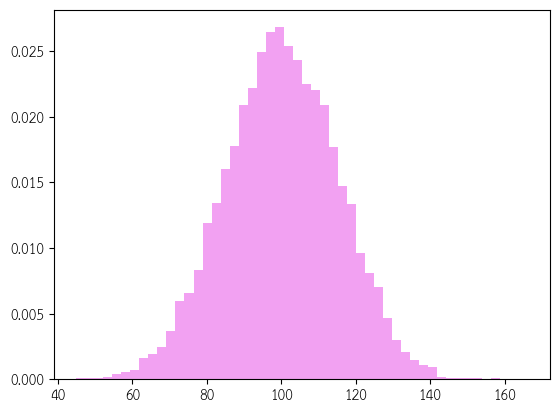

In [37]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(2024)

mu, sigma = 100, 15
X = mu + sigma * np.random.randn(10000)

plt.hist(X, 50, density = True, facecolor = 'violet', alpha = 0.75)

##ทดสอบข้อมูลหนังอินเดีย

In [89]:
data_india = pd.read_csv(movie_file_path, encoding='latin-1')
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
len(set(data_india.dropna(subset = ['Genre'])['Genre']))

485

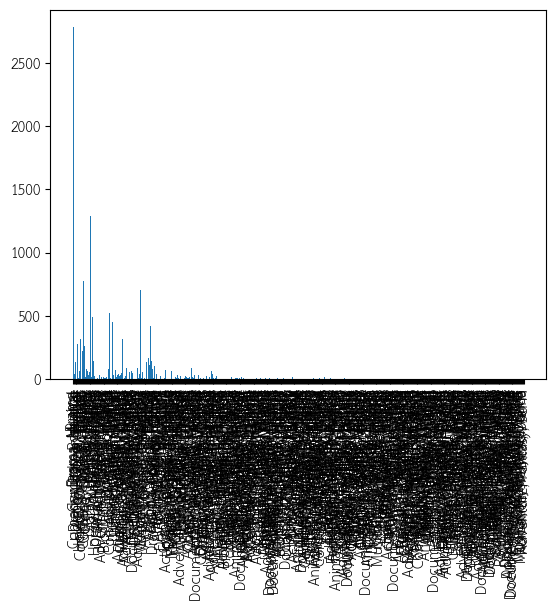

In [54]:
plt.hist(data_india.dropna(subset = ['Genre'])['Genre'], bins = len(set(data_india.dropna(subset = ['Genre'])['Genre'])));
plt.xticks(rotation = 'vertical');

In [90]:
# prompt: split value in column genre by ','  and make more column for each those
# Split the 'Genre' column by ',' and expand into multiple columns
genre_split = movie_df['Genre'].str.split(',', expand=True)

# Rename the new columns
genre_split.columns = ['Genre1', 'Genre2', 'Genre3'] # remove parentheses from columns

# Concatenate the new columns with the original DataFrame
data_india = pd.concat([data_india, genre_split], axis=1)

# Display the updated DataFrame
data_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,NaN,NaN,NaN
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,NaN,NaN,NaN
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,NaN,NaN,NaN


In [91]:
# prompt: delete space in the value in Genre1 Genre2 Genre3

for col in ['Genre1', 'Genre2', 'Genre3']:
  if col in data_india.columns:
    data_india[col] = data_india[col].str.strip() if data_india[col].dtype == object else data_india[col]
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,NaN,NaN,NaN
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,NaN
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,NaN,NaN,NaN
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,NaN
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,NaN,NaN,NaN
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,Drama,NaN
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,NaN,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
allGenre = list(data_india['Genre1']) + list(data_india['Genre2']) + list(data_india['Genre3'])

In [69]:
len(set(allGenre))

24

In [70]:
# prompt: delete all None from the allGenre list

allGenre = [x for x in allGenre if x is not None]
allGenre

[nan,
 'Drama',
 nan,
 'Comedy',
 nan,
 'Comedy',
 'Drama',
 nan,
 'Horror',
 'Action',
 'Drama',
 'Horror',
 'Horror',
 'Comedy',
 nan,
 'Comedy',
 nan,
 nan,
 'Comedy',
 nan,
 nan,
 'Crime',
 'Horror',
 nan,
 nan,
 'Comedy',
 nan,
 nan,
 'Drama',
 nan,
 'Drama',
 nan,
 'Drama',
 'Action',
 'Action',
 nan,
 'Drama',
 nan,
 'Horror',
 'Horror',
 'Drama',
 'Horror',
 'Action',
 'Action',
 'Thriller',
 'Comedy',
 nan,
 nan,
 nan,
 nan,
 'Adventure',
 'Action',
 nan,
 'Comedy',
 'Action',
 'Crime',
 nan,
 nan,
 'Comedy',
 nan,
 'Thriller',
 'Drama',
 'Sport',
 'Biography',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Drama',
 'Horror',
 'Comedy',
 nan,
 'Crime',
 'Comedy',
 'Comedy',
 nan,
 nan,
 'Drama',
 'Adventure',
 nan,
 nan,
 'Action',
 nan,
 'Comedy',
 'Drama',
 nan,
 'Crime',
 'Drama',
 'Horror',
 'Horror',
 'Horror',
 nan,
 nan,
 'Drama',
 'Drama',
 nan,
 'Drama',
 nan,
 'Thriller',
 'Action',
 nan,
 nan,
 nan,
 nan,
 'Action',
 nan,
 nan,
 nan,
 'Horror',
 'Drama',
 nan,
 nan,
 'Comedy',
 'A

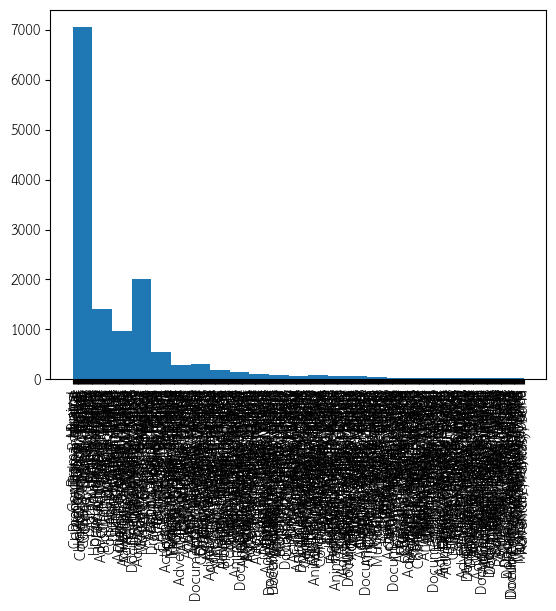

In [71]:
plt.hist(allGenre)
plt.xticks(rotation = 'vertical');

# Quize15 หาพระเอก-นางเอกที่มักจะแสดงคู่กันด้วย Histogram (พระเอก = Actor1, นางเอก = Actor2)

In [92]:
data_india.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Genre1', 'Genre2', 'Genre3'],
      dtype='object')

In [98]:
data_india = data_india.dropna(subset = ['Actor 1', 'Actor 2'])
data_india[['Actor 1', 'Actor 2']].isnull().sum()

,0
Actor 1,0
Actor 2,0


In [99]:
# รวมคู่ของพระเอกและนางเอกในคอลัมน์ Actor1 (พระเอก) และ Actor2 (นางเอก)
data_india['Pair'] = data_india[['Actor 1', 'Actor 2']].apply(lambda x: f'{x[0]} & {x[1]}', axis=1)

<ipython-input-99-d843980fb444>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_india['Pair'] = data_india[['Actor 1', 'Actor 2']].apply(lambda x: f'{x[0]} & {x[1]}', axis=1)
<ipython-input-99-d843980fb444>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_india['Pair'] = data_india[['Actor 1', 'Actor 2']].apply(lambda x: f'{x[0]} & {x[1]}', axis=1)


In [100]:
# นับจำนวนครั้งที่แต่ละคู่ปรากฏ
pair_counts = data_india['Pair'].value_counts()
pair_counts

,count
Pair,
Jeetendra & Rekha,21
Dharmendra & Hema Malini,16
Jeetendra & Jaya Prada,15
Dara Singh & Mumtaz,11
Jeetendra & Hema Malini,10
...,...
Chander Sharma & Akashdeep,1
Ashraf Khan & Zebunissa,1
Feroze Dastur & Rabab,1


In [102]:
# prompt: delete pair count count = 1 and  count = 2 count = 3

pair_counts_filtered = pair_counts[pair_counts > 3]
pair_counts_filtered


,count
Pair,
Jeetendra & Rekha,21
Dharmendra & Hema Malini,16
Jeetendra & Jaya Prada,15
Dara Singh & Mumtaz,11
Jeetendra & Hema Malini,10
...,...
Joy Mukherjee & Saira Banu,4
Leela Chitnis & Ashok Kumar,4
Sanjeev Kumar & Rakhee Gulzar,4


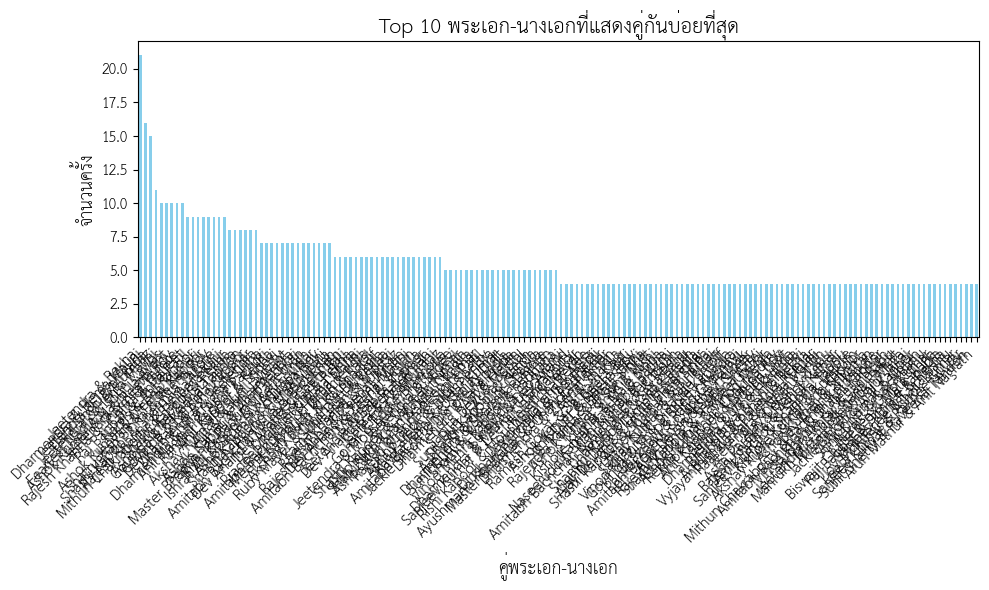

In [103]:
# สร้าง Histogram
plt.figure(figsize=(10, 6))
pair_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 พระเอก-นางเอกที่แสดงคู่กันบ่อยที่สุด', fontsize=14)
plt.xlabel('คู่พระเอก-นางเอก', fontsize=12)
plt.ylabel('จำนวนครั้ง', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [81]:
actor_pairs = data_india.groupby(['Actor 1', 'Actor 2'])['Name'].count().reset_index()
actor_pairs

,Actor 1,Actor 2,Name
0,A. Muthu,Aftab Shivdasani,1
1,A. Nairang,Mahendra Sandhu,1
2,A.K. Hangal,Aruna Irani,1
3,A.K. Hangal,Jean-Marie Lamour,1
4,A.K. Hangal,Shreeram Lagoo,1
...,...,...,...
11326,Zubeida,Hadi,1
11327,Zubeida,Shahu Modak,2
11328,Zuber Kamal Khan,Gehana Vasisth,1
11329,Zulfi Sayed,Masumeh Makhija,1


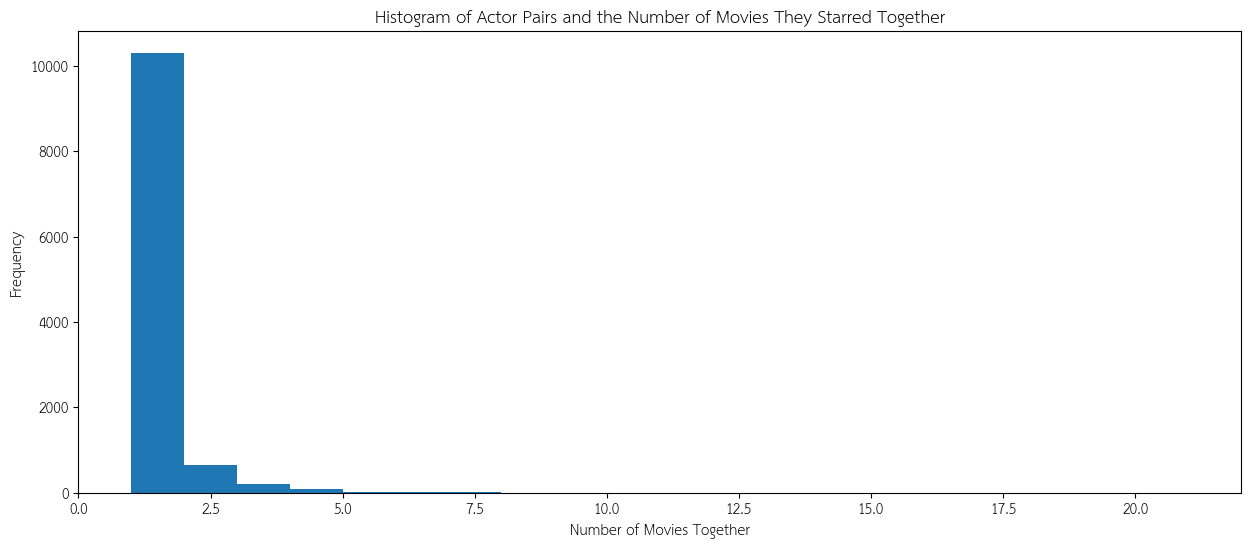

In [80]:
# prompt: หาพระเอก-นางเอกที่มักจะแสดงคู่กันด้วย Histogram (พระเอก = Actor1, นางเอก = Actor2) โดยให้แกน x เป็นชื่อนักแสดงส่วนแกน y เป็นจำนวยเรื่องที่แสดงด้วยกัน

import matplotlib.pyplot as plt
# Assuming your DataFrame is named 'data_india' and has 'Actor 1' and 'Actor 2' columns
actor_pairs = data_india.groupby(['Actor 1', 'Actor 2'])['Name'].count().reset_index()
actor_pairs = actor_pairs.rename(columns={'Name': 'Number of Movies Together'})

# Create a histogram
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
plt.hist(actor_pairs['Number of Movies Together'], bins=20)
plt.xlabel('Number of Movies Together')
plt.ylabel('Frequency')
plt.title('Histogram of Actor Pairs and the Number of Movies They Starred Together')
plt.show()


# If you want to show the names of the actors on the x-axis, you can do something like this:
# (Note that this might be difficult to read if there are many unique pairs)
# plt.hist(actor_pairs['Actor 1'] + ' & ' + actor_pairs['Actor 2'], bins=len(actor_pairs))
# plt.xticks(rotation='vertical')
# plt.show()


ตัวอย่างข้อมูล wongnai.com

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,15]
output = plt.hist(list(data['number_of_result']),10,facecolor = 'red' ,alpha = 0.75)

แก้ไข แกน x ที่เรียงข้อมูลผิด

In [ ]:
data.dtypes

เรียกดู data type ของ ตัวแปร

In [ ]:
type(data['number_of_result'][0])

ตรวจสอบ data type ของตัวแปร

In [ ]:
type(data['number_of_result'][0]) == int

ตรวจสอบดูทุกๆค่าใน column 'number_of_result'

In [ ]:
# for x in data['number_of_result']:
#     if type(x) != int:
#         print(f'{x} -> {type(x)}')


In [ ]:
new_type = data['number_of_result'].astype('int32')

ลบ record ที่มีค่า ใน column 'number_of_result' เป็น number of result

In [ ]:
data[data['number_of_result']=='number_of_result']

In [ ]:
data = data.drop(1000016)

In [ ]:
data[data['number_of_result']=='number_of_result']

In [ ]:
new_type = data['number_of_result'].astype('int32')

In [ ]:
output = plt.hist(new_type,100,facecolor = 'red' ,alpha = 0.75)

ลบ outlier

In [ ]:
new_type_nooutlier = new_type[new_type < 25]

In [ ]:
new_type.shape[0] - new_type_nooutlier.shape[0]

In [ ]:
matplotlib.rcParams['figure.figsize']=[8,8]
output = plt.hist(new_type_nooutlier,10,facecolor = 'red' ,alpha = 0.75)

Quiz 7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุด กับ แท่งอื่นๆรวมกัน

In [ ]:
output

In [ ]:
output[0]

In [ ]:
output[0][-1]

In [ ]:
sum(output[0][:-1])

## Tree map

In [ ]:
!pip install squarify

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import squarify

In [ ]:
squarify.plot(output[0])

In [ ]:
squarify.plot(output[0],value=output[0])

In [ ]:
squarify.plot(output[0],value=output[0],norm_y=60)

## Radar Chart

In [ ]:
import numpy as np
import pandas as pd  #import pandas มาเพราะข้อมูลจะเกี่ยวกับตาราง
import matplotlib.pyplot as plt
from math import pi #import math มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [ ]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
         'cheese' : [2,5,4,3],
         'beer' : [2,1,3,5],
         'chicken' : [5,3,3,4],
        'bread' : [4,3,2,1],
       'coffee' : [2,3,5,3]}
df = pd.DataFrame.from_dict(data)
df

In [ ]:
categories = list(df.columns[1:])
categories

In [ ]:
values = df.mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid' , color = '#ea3033') #เส้นกราฟ
ax.fill(angles, values, 'lightpink', alpha=0.5) #พื้นที่

In [ ]:
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

# part 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Client c1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)

# part 2
val_c2=df.loc[1].drop('client_id').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='Client c2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))